In [1]:
import torch
import torch.nn as nn

from src.data import Dataset
from src.models import Generator, GlobalDiscriminator, LocalDiscriminator
from src.visualization import imshow


Dataset generation for the sake of this notebook. It should be substituted with DVC.

In [2]:
#import pandas as pd
#pd.read_csv('data/list_attr_celeba.csv').image_id.head(20000).to_csv('data/dataset.csv')

In [3]:
dataset = Dataset()
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1)

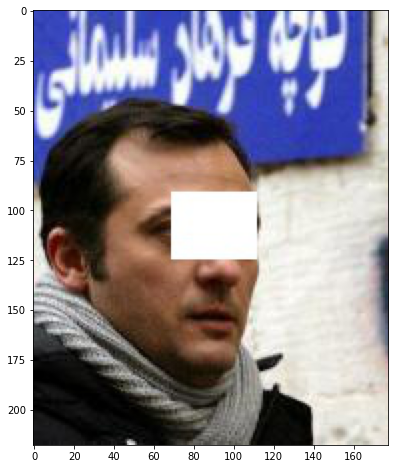

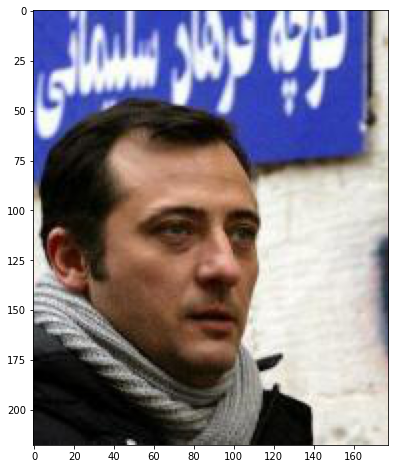

tensor([[69, 91, 43, 34]], dtype=torch.int8)


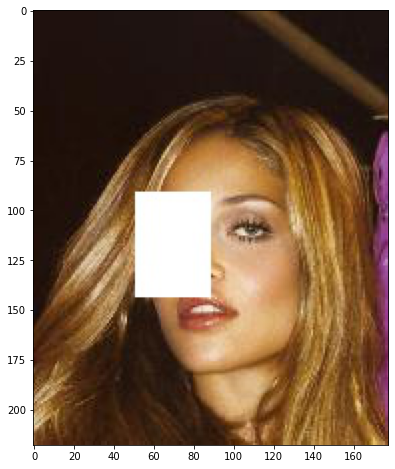

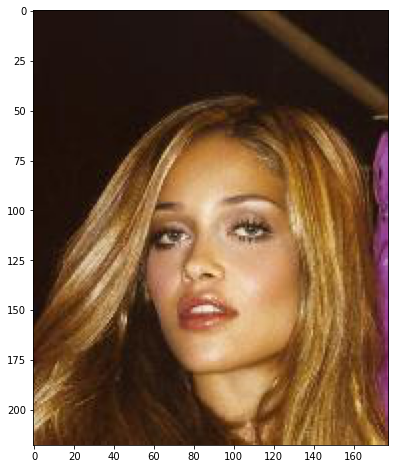

tensor([[51, 91, 38, 53]], dtype=torch.int8)


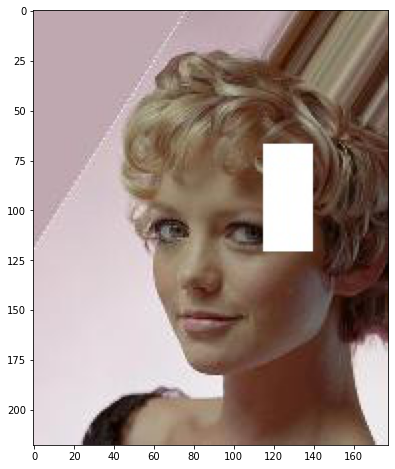

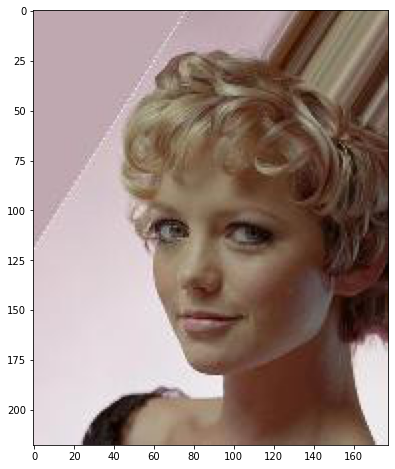

tensor([[115,  67,  25,  54]], dtype=torch.int8)


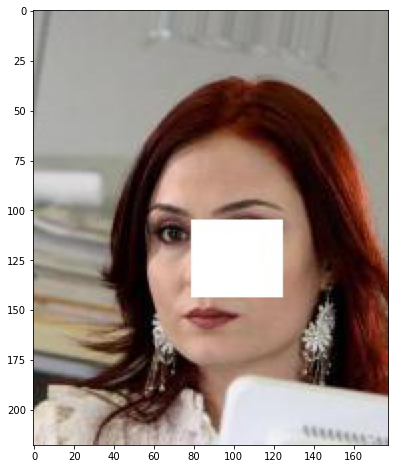

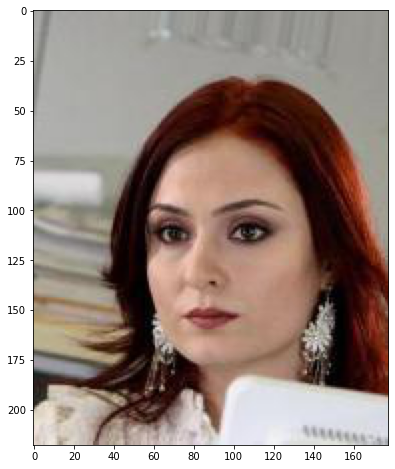

tensor([[ 79, 105,  46,  39]], dtype=torch.int8)


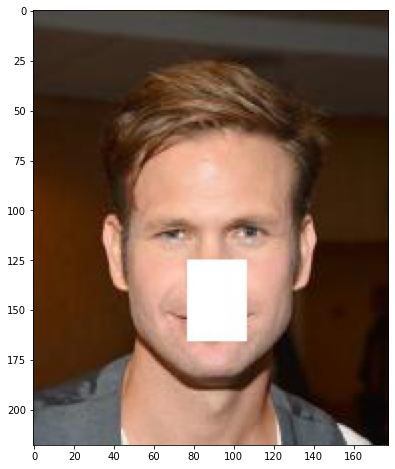

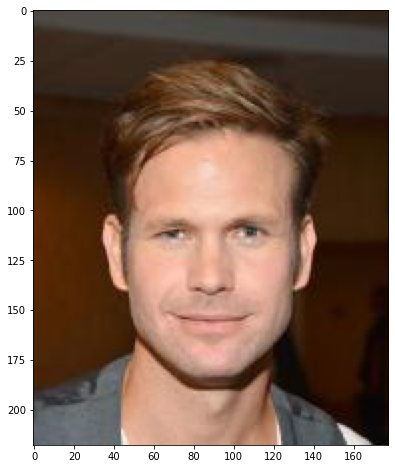

tensor([[ 77, 125,  30,  41]], dtype=torch.int8)


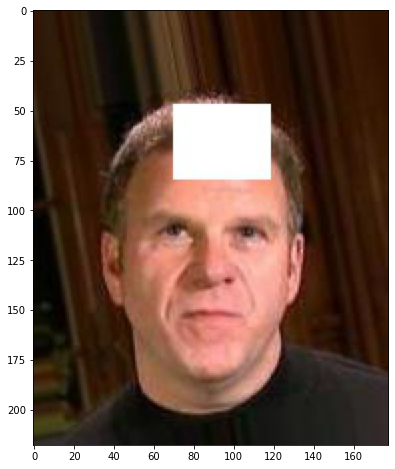

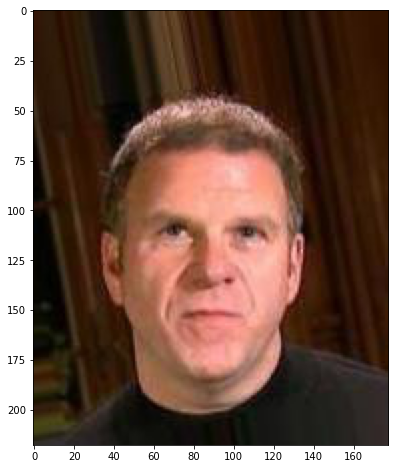

tensor([[70, 47, 49, 38]], dtype=torch.int8)


In [4]:
for i, batch in enumerate(dataloader):
    imshow(batch[0])
    imshow(batch[1])
    print(batch[2])
    if i == 5: break

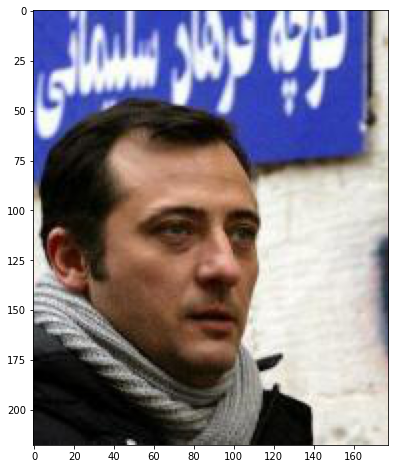

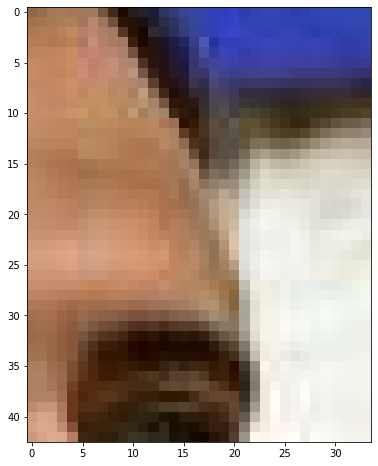

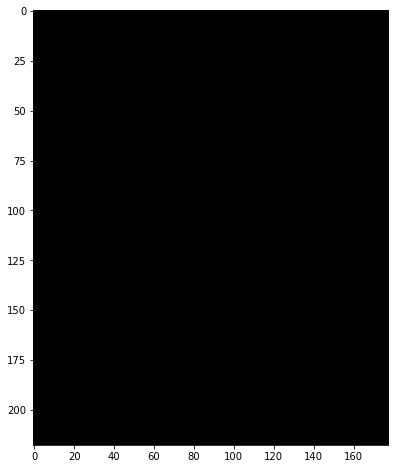

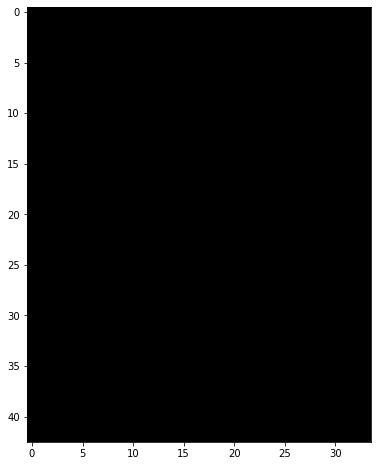

tensor([[0.5189]], grad_fn=<SqueezeBackward1>)
tensor([[0.5396]], grad_fn=<SigmoidBackward0>)


In [5]:
netG = Generator()
netGD = GlobalDiscriminator()
netLD = LocalDiscriminator()

for i, batch in enumerate(dataloader):
    if i == 1: break
    x, y, w, h = batch[2].tolist()[0]
    
    snippet = batch[1][0][x:x+w, y:y+h]
    imshow(batch[1])
    imshow(batch[1][0][x:x+w, y:y+h])
    
    reconstructed = netG(batch[1])
    imshow(reconstructed)
    imshow(reconstructed[0][x:x+w, y:y+h])

    prob_global = netGD(reconstructed)
    print(prob_global)
    prob_local = netLD(reconstructed[0][x:x+w, y:y+h])
    print(prob_local)
   

In [6]:
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
#netG = Generator()
#netD = Discrimator()
#
#netG.to(device=device)
#netD.to(device=device)

In [8]:
#lr = 1e-3
#epochs = 1000
#batch_size = 32

In [9]:
#dataset = Dataset()
#dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size)

In [10]:
#criterion = nn.BCELoss() 
#optimizerG = nn.optim.Adam(netG.parameters(), lr=lr)
#optimizerD = nn.optim.Adam(netD.parameters(), lr=lr)

In [11]:
#for e in range(epochs):
#    for i, data in enumerate(dataloader):
#        #fitting
        